In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pickle

In [50]:
url = 'https://raw.githubusercontent.com/IvanVoinovGitHub/FinancialMarketAnalysis/main/data/amazon_stock_price.csv'
amazon_data = pd.read_csv(url)

In [51]:
amazon_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,15-05-1997,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,16-05-1997,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,19-05-1997,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,20-05-1997,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,21-05-1997,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
6120,09-09-2021,3526.020020,3549.989990,3480.370117,3484.159912,3484.159912,2719200
6121,10-09-2021,3501.830078,3508.449951,3462.909912,3469.149902,3469.149902,2393300
6122,13-09-2021,3482.800049,3497.959961,3438.000000,3457.169922,3457.169922,2569000
6123,14-09-2021,3475.550049,3486.810059,3437.709961,3450.000000,3450.000000,1936900


In [52]:
amazon_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,15-05-1997,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,16-05-1997,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,19-05-1997,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,20-05-1997,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,21-05-1997,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [53]:
amazon_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6120,09-09-2021,3526.020020,3549.989990,3480.370117,3484.159912,3484.159912,2719200
6121,10-09-2021,3501.830078,3508.449951,3462.909912,3469.149902,3469.149902,2393300
6122,13-09-2021,3482.800049,3497.959961,3438.000000,3457.169922,3457.169922,2569000
6123,14-09-2021,3475.550049,3486.810059,3437.709961,3450.000000,3450.000000,1936900
6124,15-09-2021,3442.520020,3485.149902,3402.010010,3475.790039,3475.790039,2921019


In [54]:
amazon_data.shape

(6125, 7)

In [55]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6125 entries, 0 to 6124
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6125 non-null   object 
 1   Open       6125 non-null   float64
 2   High       6125 non-null   float64
 3   Low        6125 non-null   float64
 4   Close      6125 non-null   float64
 5   Adj Close  6125 non-null   float64
 6   Volume     6125 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 335.1+ KB


In [56]:
amazon_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6125.000000,6125.000000,6125.000000,6125.000000,6125.000000,6.125000e+03
mean,506.711946,512.263599,500.544531,506.589874,506.589874,7.351046e+06
std,836.045119,844.598987,826.233207,835.548822,835.548822,7.159739e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,38.619999,39.439999,38.049999,38.720001,38.720001,3.600100e+06
50%,91.800003,93.400002,89.750000,91.300003,91.300003,5.483600e+06
75%,512.989990,519.409973,502.570007,511.890015,511.890015,8.310500e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.043292e+08


In [57]:
amazon_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [58]:
amazon_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [59]:
amazon_data = amazon_data.drop(columns=['Adj Close'])

In [60]:
amazon_data.head()

,Date,Open,High,Low,Close,Volume
0,15-05-1997,2.437500,2.500000,1.927083,1.958333,72156000
1,16-05-1997,1.968750,1.979167,1.708333,1.729167,14700000
2,19-05-1997,1.760417,1.770833,1.625000,1.708333,6106800
3,20-05-1997,1.729167,1.750000,1.635417,1.635417,5467200
4,21-05-1997,1.635417,1.645833,1.375000,1.427083,18853200


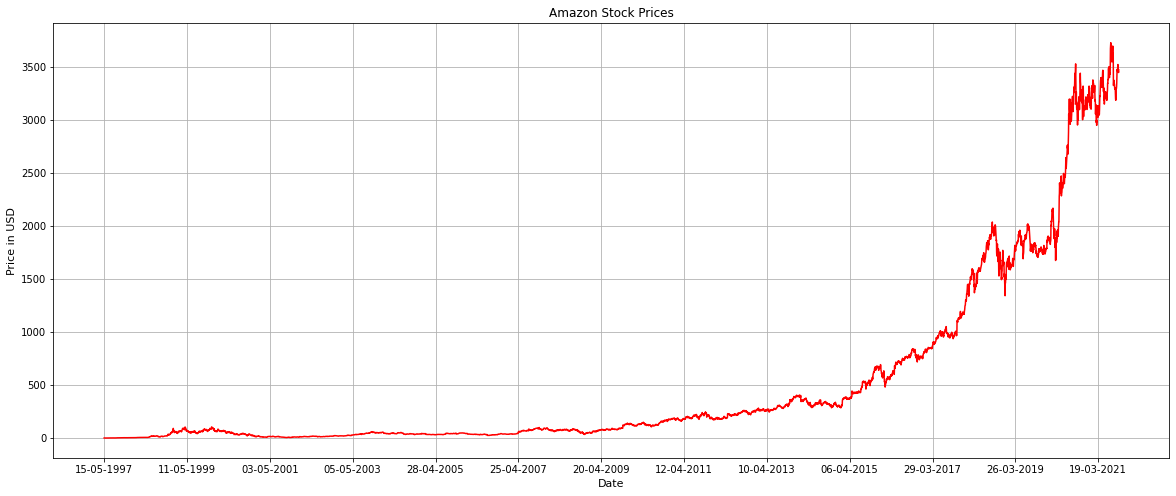

In [61]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(amazon_data['Date'], amazon_data['Close'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Amazon Stock Prices')
plt.grid()
plt.show()

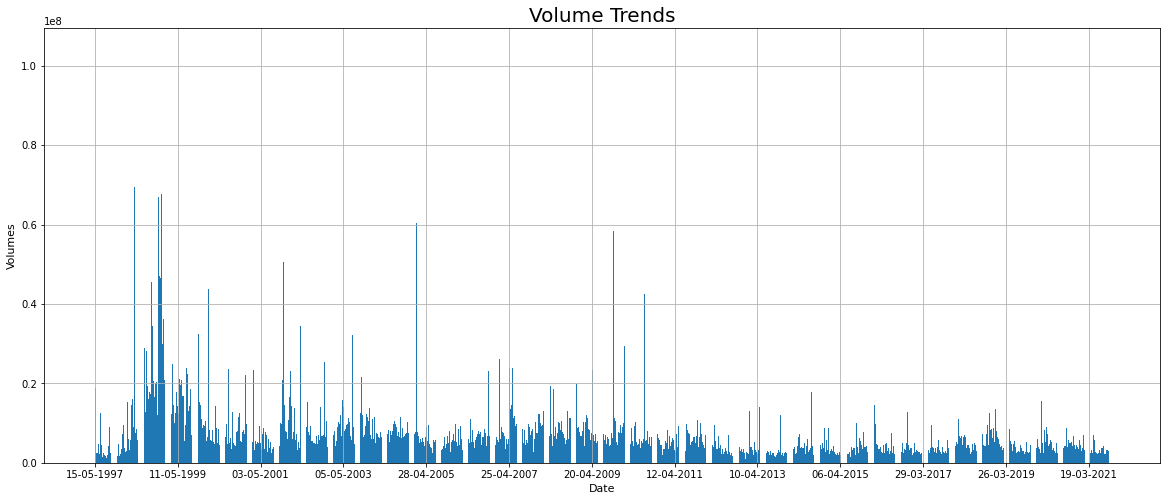

In [62]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(amazon_data['Date'], amazon_data['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Volumes', fontsize='11')
plt.title('Volume Trends', fontsize='20')
plt.grid()
plt.show()


In [63]:
amazon_data['Market Cap'] = amazon_data['Open']*amazon_data['Volume']

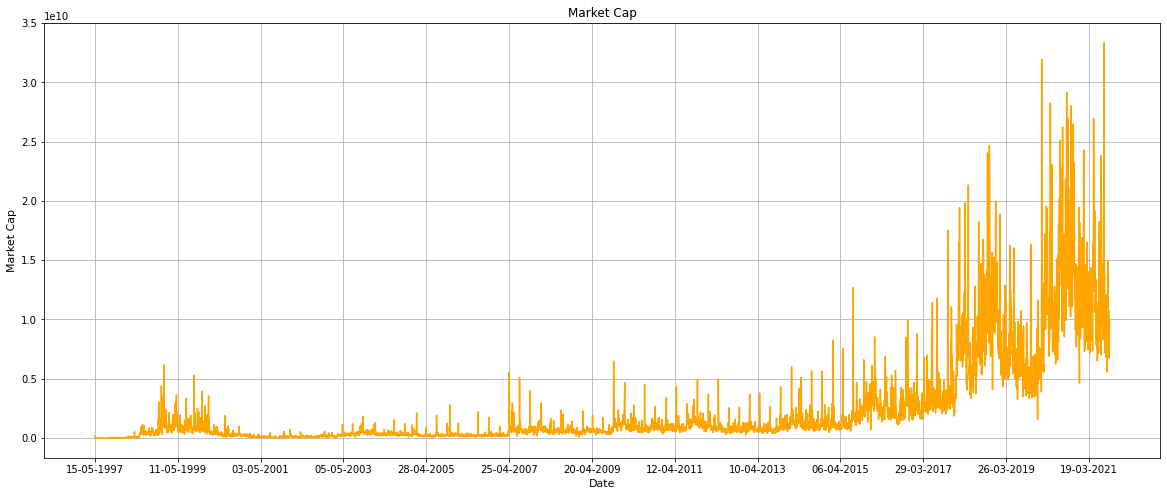

In [64]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(amazon_data['Date'], amazon_data['Market Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.title('Market Cap')
plt.grid()
plt.show()

In [65]:
amazon_data.iloc[amazon_data['Market Cap'].argmax()]

Date                30-07-2021
Open               3347.949951
High               3368.139893
Low                 3306.97998
Close              3327.590088
Volume                 9957100
Market Cap    33335872457.1021
Name: 6092, dtype: object

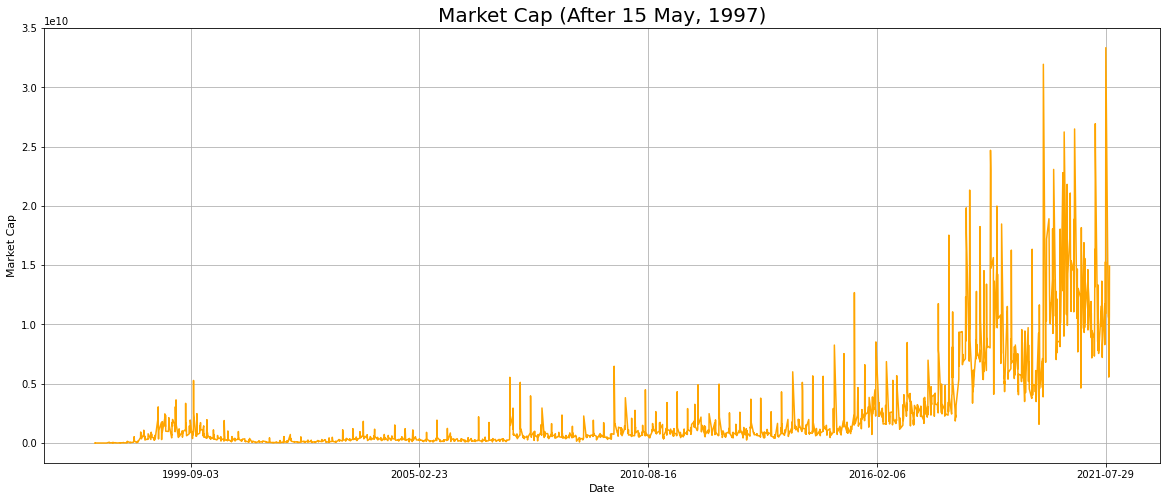

In [66]:
ohlc = amazon_data[(amazon_data['Date'] > '1997-05-15')]
ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume',
'Market Cap']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format='%d-%m-%Y')
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(ohlc['Date'], ohlc['Market Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.grid()
plt.title('Market Cap (After 15 May, 1997)', fontsize='20')
plt.show()

In [67]:
amazon_data['vol'] = (amazon_data['Close']/amazon_data['Close'].shift(1)) - 1

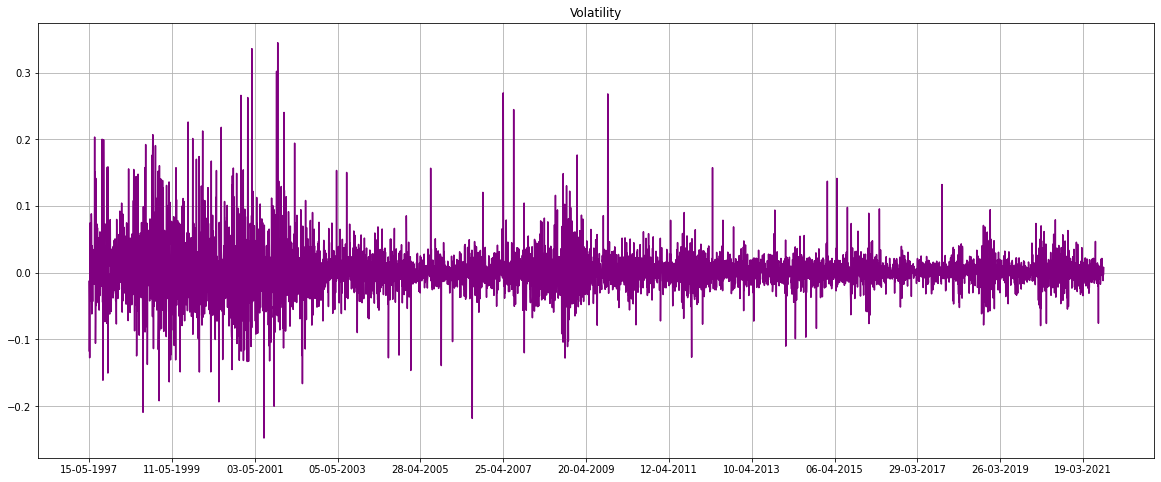

In [68]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(amazon_data['Date'], amazon_data['vol'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility')
plt.grid()
plt.show()


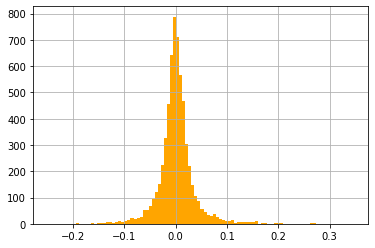

In [69]:
amazon_data['vol'].hist(bins=100, color='orange')

In [70]:
amazon_data['Cumulative Return'] = (1 + amazon_data['vol']).cumprod()

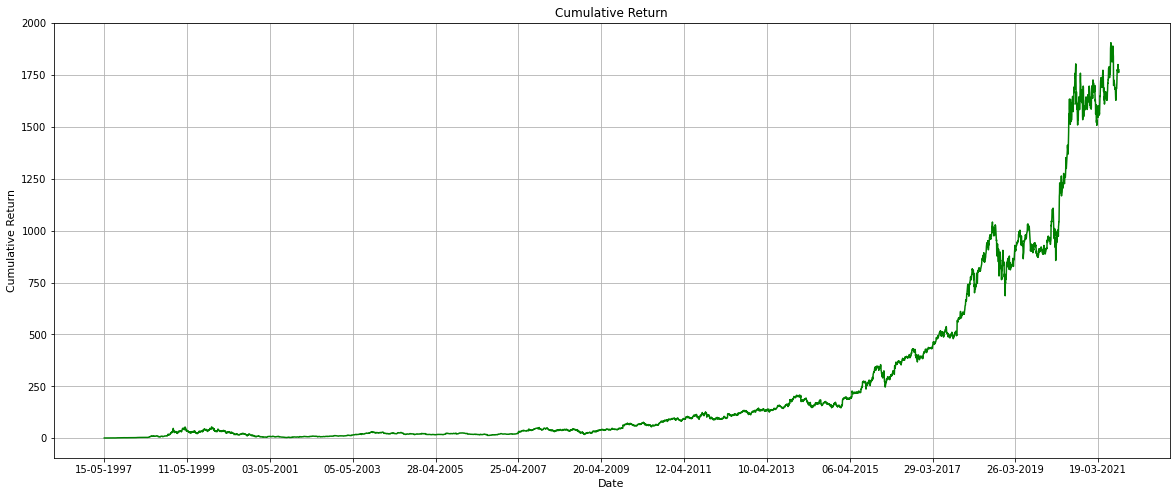

In [71]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(amazon_data['Date'], amazon_data['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.title('Cumulative Return')
plt.grid()
plt.show()

In [72]:
amazon_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap,vol,Cumulative Return
0,15-05-1997,2.437500,2.500000,1.927083,1.958333,72156000,1.758802e+08,NaN,NaN
1,16-05-1997,1.968750,1.979167,1.708333,1.729167,14700000,2.894062e+07,-0.117021,0.882979
2,19-05-1997,1.760417,1.770833,1.625000,1.708333,6106800,1.075051e+07,-0.012049,0.872340
3,20-05-1997,1.729167,1.750000,1.635417,1.635417,5467200,9.453702e+06,-0.042683,0.835107
4,21-05-1997,1.635417,1.645833,1.375000,1.427083,18853200,3.083284e+07,-0.127389,0.728723


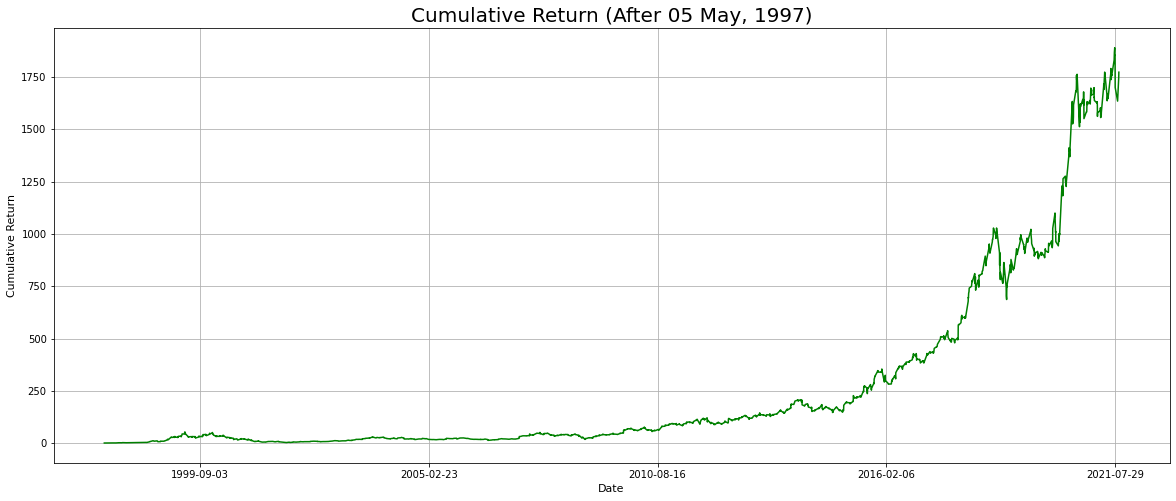

In [73]:
ohlc = amazon_data[(amazon_data['Date'] > '1997-05-15')]
ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'vol','Cumulative Return']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format='%d-%m-%Y')
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(ohlc['Date'], ohlc['Cumulative Return'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Cumulative Return', fontsize='11')
plt.grid()
plt.title('Cumulative Return (After 05 May, 1997)', fontsize='20')
plt.show()

In [74]:
amazon_data.iloc[amazon_data['Cumulative Return'].argmax()]


Date                         08-07-2021
Open                        3643.560059
High                         3759.98999
Low                         3621.120117
Close                       3731.409912
Volume                          5180600
Market Cap           18875827241.655399
vol                            0.009422
Cumulative Return            1905.40113
Name: 6076, dtype: object

In [75]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [76]:
amazon_data['Date'] = pd.to_datetime(amazon_data['Date'])
amazon_data.set_index('Date',inplace=True)


In [77]:
data = amazon_data.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

4900

In [78]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[1.50803720e-04],
       [8.93653463e-05],
       [8.37798446e-05],
       ...,
       [9.26477492e-01],
       [9.24555268e-01],
       [9.31469462e-01]])

In [80]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60,len(train_data)):
   x_train.append(train_data[i-60:i, 0])
   y_train.append(train_data[i,0])
   if i<=60:
     print(x_train)
     print(y_train)
     print()


[array([1.50803720e-04, 8.93653463e-05, 8.37798446e-05, 6.42313929e-05,
       8.37798446e-06, 0.00000000e+00, 2.79267042e-05, 5.02679068e-05,
       3.63046887e-05, 2.93229456e-05, 2.79267042e-05, 3.07194551e-05,
       2.23414706e-05, 5.58550171e-06, 3.90974396e-05, 6.98166266e-05,
       7.81946110e-05, 5.02679068e-05, 3.90974396e-05, 5.58534085e-05,
       5.02679068e-05, 4.74754240e-05, 2.93229456e-05, 3.07194551e-05,
       3.07194551e-05, 3.49084473e-05, 2.79267042e-05, 3.07194551e-05,
       3.07194551e-05, 3.07194551e-05, 2.51339534e-05, 3.90974396e-05,
       3.21156965e-05, 5.16644163e-05, 1.38236744e-04, 1.61974456e-04,
       2.42961549e-04, 2.48547051e-04, 3.12778176e-04, 2.40169067e-04,
       1.98279144e-04, 2.79266238e-04, 2.51339534e-04, 2.20620347e-04,
       2.03864378e-04, 2.10846121e-04, 1.98279144e-04, 2.40169067e-04,
       2.31791082e-04, 2.23413098e-04, 2.48547051e-04, 2.90436973e-04,
       2.82058989e-04, 2.68095503e-04, 2.73681005e-04, 2.45754300e-04,
     

In [81]:
x_train,y_train = np.array(x_train), np.array(y_train)


In [82]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(4840, 60, 1)

In [84]:
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [85]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [86]:
model.fit(x_train,y_train, batch_size=1, epochs=10)


Epoch 1/10
4840/4840 [==============================] - 145s 29ms/step - loss: 5.4505e-05
Epoch 2/10
4840/4840 [==============================] - 140s 29ms/step - loss: 2.4849e-05
Epoch 3/10
4840/4840 [==============================] - 138s 28ms/step - loss: 2.0770e-05
Epoch 4/10
4840/4840 [==============================] - 136s 28ms/step - loss: 1.4969e-05
Epoch 5/10
4840/4840 [==============================] - 139s 29ms/step - loss: 1.1837e-05
Epoch 6/10
4840/4840 [==============================] - 138s 29ms/step - loss: 1.1264e-05
Epoch 7/10
4840/4840 [==============================] - 141s 29ms/step - loss: 8.3897e-06
Epoch 8/10
4840/4840 [==============================] - 139s 29ms/step - loss: 8.4726e-06
Epoch 9/10
4840/4840 [==============================] - 137s 28ms/step - loss: 7.0110e-06
Epoch 10/10
4840/4840 [==============================] - 135s 28ms/step - loss: 6.6033e-06


In [88]:
test_data= scaled_data[training_data_len-60:, :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
   x_test.append(test_data[i-60:i,0])


In [89]:
x_test = np.array(x_test)

In [90]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape


(1225, 60, 1)

In [91]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [99]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://e817b44b-3afd-4bd3-be5d-80269b155f9a/assets


INFO:tensorflow:Assets written to: ram://e817b44b-3afd-4bd3-be5d-80269b155f9a/assets


In [92]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

160.13297770371494

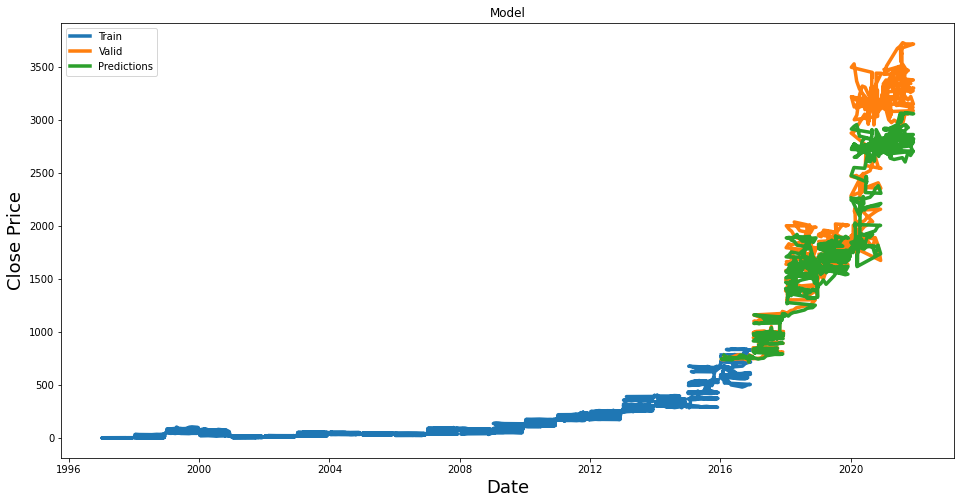

In [93]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='upper_center')

In [94]:
valid


,Close,Predictions
Date,,
2016-02-11,765.559998,783.532227
2016-03-11,767.030029,762.775879
2016-04-11,755.049988,766.093506
2016-07-11,784.929993,752.739624
2016-08-11,787.750000,784.287476
...,...,...
2021-09-09,3484.159912,2957.631348
2021-10-09,3469.149902,2930.275146
2021-09-13,3457.169922,2927.385254


In [96]:
amazon_quote = pd.read_csv(url)
new_amazon_data = amazon_quote.filter(['Close'])
last_60_days = new_amazon_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
pred_price= model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[2936.054]], dtype=float32)